# NFPA CBA Example 4 : High Rise Office Building (COM4)

## Notebook initialization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction
This Notebook presents an example application of the prototype methodology for cost-benefit analysis. This case study considers a nine story office building. For background on the model and considered input values, see the background document.

The benefit of the sprayed fire resitance material (SFRM) is evaluated based on the probability of structural failure with the SFRM at increasing levels from one hour to 3 hours levels of protection. The structure is assumed to have no other fire protection measure. 

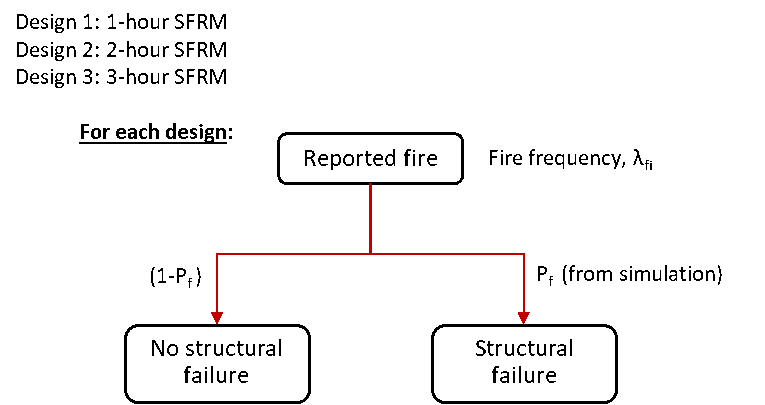

## I. Input
User input in this area.  
Note: All monetary values in 2022 USD.  

### I.1 Building characteristics
The building design is based on a FEMA/SAC project for the Boston area post Northridge

In [2]:
S_area = 18810 # [m2] Floor area of structure
Construction_Cost = 1674.43 # [USD/m2] Construction cost; evaluated through (RSMeans, 2022)
Demol_cost = 59.82 # [USD/m2] Demolition cost; evaluated through (RSMeans, 2022)
Disposal_cost = 0.145 # [USD/m2] Disposal cost; evaluated through (RSMeans, 2022)

SFRM_time = np.array([1,2,3, 1,2,3]) #These ratings are the times in hours that the SFRM is expected to protect the structural members from the fire
# note: duplicate ratings are used as two different fire load models are explored within the case study

### I.2 Discount rate and obsolescence rate

In [3]:
g = 0.03 # [1/year] continuous discount rate; 3% based on (Fischer, 2014)
o = 0    # [1/year] obsolescence rate; 0% - building obsolescence neglected

### I.3 Cost of fire protection

#### I.3.a Investment cost fire protection

In [4]:
c_ins_unitcost= np.array([13.66, 23.76, 40.99, 13.66, 23.76, 40.99]) # [USD/m2] SFRM unit installation cost, evaluated through (RSMeans, 2022). The duplicate cost values are used as two different fire load models are explored in the case study.  
c_ins = c_ins_unitcost[0:]*S_area # [USD] Total installation cost

#### I.3.b Maintenance cost fire protection

In [5]:
m= 0*c_ins  # [USD per year] annual maintenance cost; 0% of SFRM installation cost assuming that no maintenance of the sprayed material is required.

### I.4 Benefit of fire protection 
Benefit evaluation as reduction in cost of fire losses, assessed through flowchart listed in the Introduction.  
See background document for discussion.

#### I.4.a Fire frequency

In [6]:
## fire frequency
lambda_fi= 0.00423 # [1/year] fire frequency per dwelling (ignition frequency + unsuccesful immediate suppression by occupants); based on (Manes and Rush, 2019) 

#### 1.4.b SFRM reliability

In [7]:
pfsfrm = np.array([0.97,0.79,0.64,0.73,0.15,0.08]) # [-] probability of failure in case of fire for different SFRM ratings. 
# These values are obtained from simulations (see report).
# The first 3 are using the NFPA fuel distribution model and the next 3 are using the Eurocode model.

#### I.4.c Fire-induced losses

In [8]:
## valuation of risk to life
VSL = 5.657*10**6 # [2022 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
xi_in = (0.047 * VSL) # [2022 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)

In [9]:
## [fatalities/fire]
Nf_civilian = 0.9/1000 # [fatality/fire] probability of civilian fatalities; 9 fatalities per 1000 residential fires based on (NFPA 2022)
Nf_firefighter_on_ground = 6.9/1e5 # [fatality/fire] probability of firefighter fireground fatality; 6.9/1e5 based on (NFPA, 2022)
Nf_firefighter_response = 6.3/1e5 # [fatality/fire] probability of firefighter response fatality; 6.3/1e5 based on (NFPA, 2022)

In [10]:
## [injuries/fire]
Nin_civilian = 1.4/100 # [injury/fire] civilian injuries; 1.4 injuries per 100 reported fires based on (NFPA, 2022)
Nin_firefighter_on_ground = 1.62/100 # [injury/fire] firefighter fireground injuries; 1.62 injuries per 100 reported fires based on (NFPA, 2022)
Nin_firefighter_response = 0.37/100 # [injury/fire] firefighter response injuries; 0.37 injuries per 100 reported fires based on (NFPA, 2022)

In [11]:
## property loss
S_loss_0 = 18810 # [m2] average damage area in case of structural failure/inability of the SFRM to prevent failure
S_loss_s = 83.5 # [m2] average damage area in case of fire containment, assuming the fire does not spread beyond a single compartment
eps_loss_content = 2.0 # [-] property loss multiplication factor; eps_loss = ((building loss + content loss) / building loss); 2.0 based on (FEMA, 2015)
eps_loss_indirect = 1.25 # [-] total property loss multiplication factor accounting for indirect costs; 

## II. Design fire risk evaluation

### II.1 Calculation of fire scenario parameters
Input parameter calculation from raw input data.

In [12]:
## fire protection success probability
psfrm = 1-pfsfrm # [-] success probability as complement of failure probability 

In [13]:
## Unit replacement cost
Replace_cost = Construction_Cost + Demol_cost + Disposal_cost # [USD/m2] replacement cost as sum of demolition, disposal and reconstruction

### II.2 Scenario consequence evaluation
Evaluation of consequences for identified scenarios (event tree)

#### II.2.a Scenario "building failure"

In [14]:
### Fatalities and injuries
# fatality rate
Nf_0 = Nf_civilian + Nf_firefighter_on_ground + Nf_firefighter_response # [fatality/fire] total fatality rate without SFRM assuming a 5% increased risk to firefighters due to building failure
# injury rate
Nin_0 = Nin_civilian + Nin_firefighter_on_ground + Nin_firefighter_response  # [injury/fire] total injury rate without SFRM assuming a 10% increased risk to firefighters due to building failure

In [15]:
### Valuation of fatalities and injuries
# fatality valuation
Df_0=Nf_0*VSL # [USD/fire] valuation expected life loss
# injury valuation
Din_0=Nin_0*xi_in # [USD/fire] valuation expected injuries

In [16]:
### Material loss
xi_d_0= S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

In [17]:
### Total loss valuation
D0=Df_0+Din_0+xi_d_0 # expected value fire-induced loss, scenario "no SFRM"

#### II.2.b Scenario "building remains standing"

In [18]:
### Fatalities and injuries
# fatality rate
# no fire-induced fatalities in case of the SFRM successfully preventing building failure; 
# only fire fighter response fatalities considered
Nf_s = Nf_civilian + Nf_firefighter_on_ground + Nf_firefighter_response # [fatalities/fire] total fatality rate in building with SFRM

# injury rate and valuation
# reduction in civilian injuries in case of the SFRM successfully preventing building failure from fire


Nin_s = Nin_civilian + Nin_firefighter_on_ground + Nin_firefighter_response # [injury/fire] total injury rate in case of fire suppresion

In [19]:
### Valuation of fatalities and injuries
# fatality valuation
Df_s=Nf_s*VSL # [USD/fire] valuation expected life loss
# injury valuation
Din_s=Nin_s*xi_in # [USD/fire] valuation expected injuries

In [20]:
### Material loss
xi_d_s= S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD/fire] property loss given fire in case of SFRM preventing building collapse

In [21]:
### Total loss valuation
Dsup=Df_s+Din_s+xi_d_s # [USD/fire] expected value fire-induced loss, scenario "no building collapse due to SFRM"

## III. PNV calculation

### III.1 Total safety system cost *C+A*

#### III.1.a Investment cost, *C<sub>I</sub>*

In [22]:
C_I=c_ins # PNV investment cost

#### III.1.b Maintenance cost, *C<sub>M</sub>*

In [23]:
C_M=m/g # PNV of maintenace cost

#### III.1.c Obsolescence cost, *C<sub>A</sub>*

In [24]:
C_A=C_I*o/g # PNV of obsolescence cost

#### III.1.d Total safety system cost *C+A*

In [25]:
net_C=C_I+C_M+C_A # total PNV investment cost (investment cost and maintenance cost)

### III.2 Net benefit *B-D*

#### III.2.a Fire-induced losses reference design, *B*
Reference design without SFRM protection. Single scenario in event tree: scenario "failure of building without SFRM due to fire".

In [26]:
## Expected loss reference design
Dref=D0 # [USD/fire]

In [27]:
## PNV reference design
B=Dref*lambda_fi/g # [USD] PNV fire-induced losses reference design

#### III.2.b Fire-induced losses trial design, *D*
The trial design considers the additional protection to the building system by adding SFRM.  
The SFRM has a reliability psfrm.  
The overall design performance is a combination of the scenario "building failure" (with probability pfsfrm) and the scenario "building remains standing" (with probability psfrm).

In [28]:
## Expected loss design with SFRM protection
Dsp=(pfsfrm)*D0+psfrm*Dsup # [USD/fire]

In [29]:
## PNV reference design
D=Dsp*lambda_fi/g # [USD] PNV expected risk to life reference design

#### III.2.c PNV net benefit, *B-D*

In [30]:
netB=B-D # [USD] PNV net benefit

## IV. Cost-Benefit evaluation

In [31]:
BCR=netB/net_C # [-] benefit cost ratio
Z=netB-net_C # [USD] PNV of proposed safety measure
print("\nThe PNV for SFRM fire protection is, ")
for j,Zj in enumerate(Z):
    if j<3: print("\t{0:,.0f}-hour prescribed rating: {1:,.0f} [USD] (NFPA model); ".format(SFRM_time[j],Zj))
    else: print("\t{0:,.0f}-hour prescribed rating: {1:,.0f} [USD] (Eurocode model); ".format(SFRM_time[j],Zj))
      


The PNV for SFRM fire protection is, 
	1-hour prescribed rating: 86,522 [USD] (NFPA model); 
	2-hour prescribed rating: 1,957,343 [USD] (NFPA model); 
	3-hour prescribed rating: 3,350,582 [USD] (NFPA model); 
	1-hour prescribed rating: 2,834,258 [USD] (Eurocode model); 
	2-hour prescribed rating: 9,284,639 [USD] (Eurocode model); 
	3-hour prescribed rating: 9,761,966 [USD] (Eurocode model); 


# Example 1 - Parameter study and visualizations

### Visualization of cost distribution design alternatives

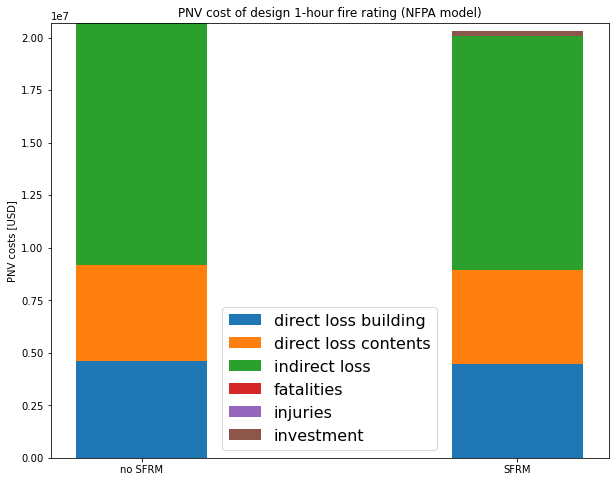

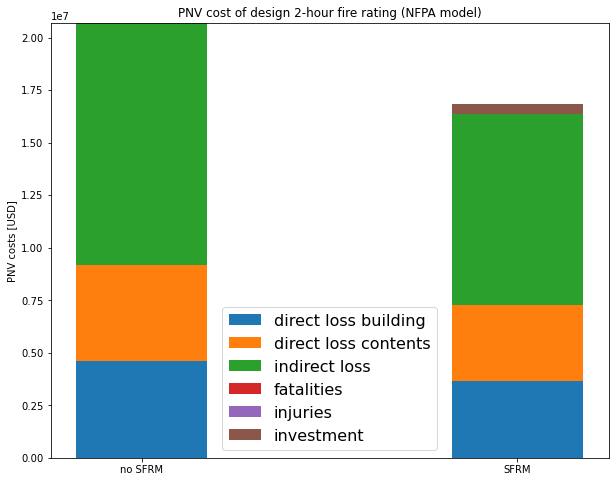

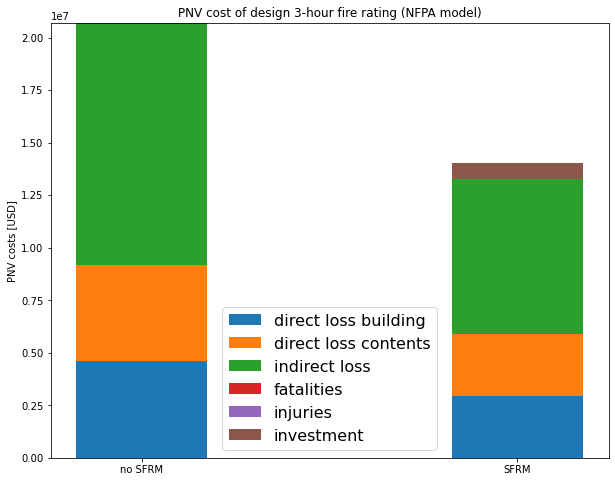

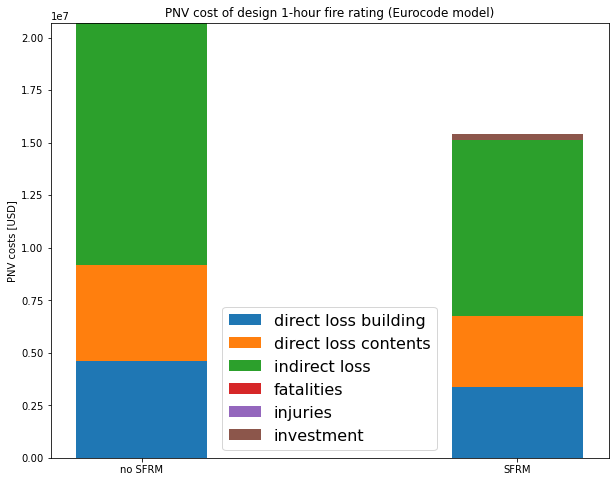

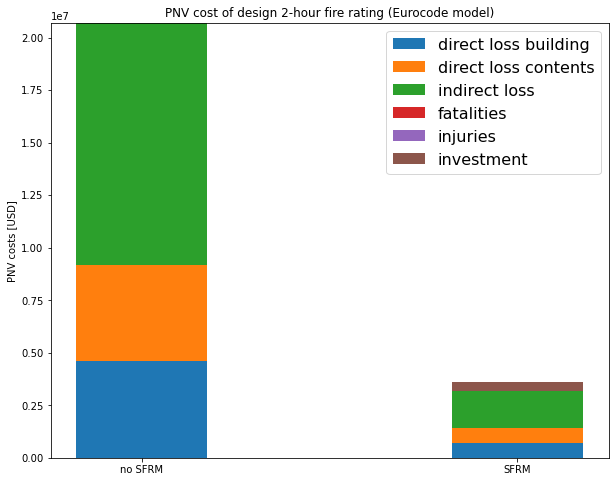

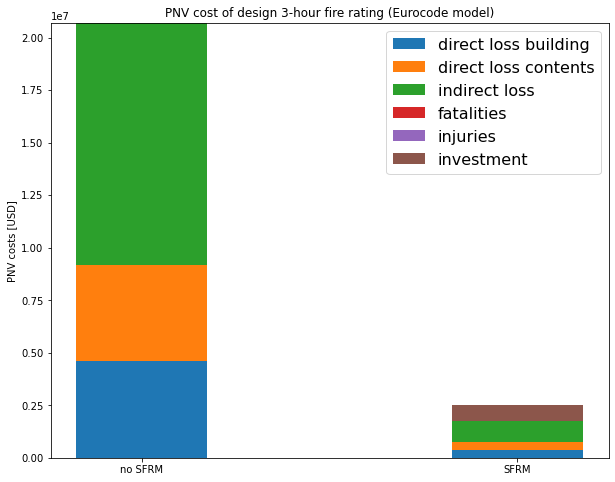

In [32]:
### Design alternatives- With and without SFRM

## Investment costs
Investment_sfrm=C_I+C_M+C_A  # [USD] array of PNV investment costs for case with SFRM (investment, maintenance, obsolescence)
Investment_nosfrm=np.array([0,0,0]) # [USD] array of PNV investment costs for case without SFRM (investment, maintenance, obsolescence)

### Two scenarios (Building failure prevented by SFRM and building failure even with SFRM)
## Scenario failure not prevented by SFRM
# valuation of risk to life
Df_0=Nf_0*VSL # [USD/fire] valuation expected life loss
Din_0=Nin_0*xi_in # [USD/fire] valuation expected injuries

# valuation of material losses
xd_direct_0= S_loss_0 * Replace_cost # [USD] direct property loss related to the building itself
xd_contents_0 = xd_direct_0*(eps_loss_content-1) # [USD] direct property loss related to the contents
xd_indirect_0 = xd_direct_0*eps_loss_content *eps_loss_indirect # indirect losses

# Array of costs and PNV evaluation
Costs_0 = np.array([xd_direct_0,xd_contents_0,xd_indirect_0,Df_0,Din_0])
Costs_0 = Costs_0 * lambda_fi/g

## Scenario failure prevented by SFRM
# valuation of risk to life
Df_s=Nf_s*VSL # [USD/fire] valuation expected life loss
Din_s=Nin_s*xi_in # [USD/fire] valuation expected injuries

# valuation of material losses
xd_direct_s= S_loss_s * Replace_cost # [USD] direct property loss related to the building itself
xd_contents_s = xd_direct_s*(eps_loss_content-1) # [USD] direct property loss related to the contents
xd_indirect_s = xd_direct_s*eps_loss_content*eps_loss_indirect # indirect losses

# Array of costs and PNV evaluation
Costs_s = np.array([xd_direct_s,xd_contents_s,xd_indirect_s,Df_s,Din_s])
Costs_s = Costs_s*lambda_fi/g

### Costs per design
## Design A, no SFRM in building members, 
psfrm_0 = 0 # No SFRM present
Costs_no_sfrm = ((1-psfrm_0) * Costs_0) + (psfrm_0 * Costs_s)
TotalCost_no_sfrm=np.append(Costs_no_sfrm,Investment_nosfrm)



## Design B, with SFRM in building members

for j in np.arange(len(psfrm[0:3])):

    Costs_sfrm = ((1-psfrm[j]) * Costs_0) + (psfrm[j] * Costs_s)
    
    TotalCost_sfrm=np.append(Costs_sfrm,Investment_sfrm[j])

    ### Visualization of cost distribution per design
    fig, ax = plt.subplots()
    labels=['no SFRM','SFRM']
    categories=['direct loss building','direct loss contents','indirect loss','fatalities','injuries','investment']
    bar_width = 0.35
    opacity = 0.8

    cumCost=np.array([0,0])
    for i, cat in enumerate(categories):
        ax.bar(labels,[TotalCost_no_sfrm[i],TotalCost_sfrm[i]],bar_width,bottom=cumCost,label=cat)
        cumCost=cumCost+np.array([TotalCost_no_sfrm[i],TotalCost_sfrm[i]])

    #ax.set_ylim((0,8000))
    ax.set_ylabel('PNV costs [USD]')
    plt.title('PNV cost of design ' +str(j+1)+ '-hour fire rating (NFPA model)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.legend(labels,fontsize=16)
    fig.set_size_inches(10,8)
    
    
    
for j in np.arange(len(psfrm[3:])):

    Costs_sfrm = (1-psfrm[j+3]) * Costs_0 + psfrm[j+3] * Costs_s
    
    TotalCost_sfrm=np.append(Costs_sfrm,Investment_sfrm[j])

    ### Visualization of cost distribution per design
    fig, ax = plt.subplots()
    labels=['no SFRM','SFRM']
    categories=['direct loss building','direct loss contents','indirect loss','fatalities','injuries','investment']
    bar_width = 0.35
    opacity = 0.8

    cumCost=np.array([0,0])
    for i, cat in enumerate(categories):
        ax.bar(labels,[TotalCost_no_sfrm[i],TotalCost_sfrm[i]],bar_width,bottom=cumCost,label=cat)
        cumCost=cumCost+np.array([TotalCost_no_sfrm[i],TotalCost_sfrm[i]])

    #ax.set_ylim((0,8000))
    ax.set_ylabel('PNV costs [USD]')
    plt.title('PNV cost of design ' +str(j+1)+ '-hour fire rating (Eurocode model)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.legend(labels,fontsize=16)
    fig.set_size_inches(10,8)


### Parameter study with damage area in the absence of structural failure

#### Function definition PNV Z, to allow parameter study psfrm and S_loss_s

In [33]:
# Function combining above model assumption for parameter study

def Zvalue(psfrm,S_loss_s):  
    ## II. Design fire risk evaluation ##
    #####################################    
    ## II.2.b Scenario "successful sprinkler suppression"
    ### Material loss
    xi_d_s= S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD/fire] property loss given fire in case of succesful sprinkler suppression
    ### Total loss valuation
    Dsup=Df_s+Din_s+xi_d_s # [USD/fire] expected value fire-induced loss, scenario "successful prevention of collapse due to SFRM"
    
    ## III. PNV calculation ##
    ##########################  
    ## III.2.b Fire-induced losses trial design, D
    ## Expected loss design with sprinkler protection
    Dsp=(1-psfrm)*D0+psfrm*Dsup # [USD/fire]
    ## PNV reference design
    D=Dsp*lambda_fi/g # [USD] PNV expected risk to life reference design
    
    ## III.2.c PNV net benefit, B-D
    netB=B-D # [USD] PNV net benefit
    
    ## IV. Cost-Benefit evaluation ##
    #################################
    #for i in np.arange(len(netB)):
    Z=netB-net_C # [USD] PNV of proposed safety measure
    BCR_var = netB/net_C
    
    return Z, BCR_var


#### Example of usage function Zvalue

In [34]:
# Example application of function Zvalue - verification base values

# input values
psfrm = psfrm # [-] probability of no structural failure due to presence of SFRM

# CBA 
out=Zvalue(psfrm,S_loss_s) # [USD] PNV of proposed safety measure
Z = out[0]; BCR_var = out[1]

print("\nThe PNV for SFRM fire protection is, ")
for j,Zj in enumerate(Z):
    if j<3: print("\t{0:,.0f}-hour prescribed rating: PNV {1:,.0f} [USD] and BCR {2:.2f} (NFPA model); ".format(SFRM_time[j],Zj,BCR[j]))
    else: print("\t{0:,.0f}-hour prescribed rating: PNV {1:,.0f} [USD] and BCR {2:.2f} (Eurocode model); ".format(SFRM_time[j],Zj,BCR[j]))


The PNV for SFRM fire protection is, 
	1-hour prescribed rating: PNV 86,522 [USD] and BCR 1.34 (NFPA model); 
	2-hour prescribed rating: PNV 1,957,343 [USD] and BCR 5.38 (NFPA model); 
	3-hour prescribed rating: PNV 3,350,582 [USD] and BCR 5.35 (NFPA model); 
	1-hour prescribed rating: PNV 2,834,258 [USD] and BCR 12.03 (Eurocode model); 
	2-hour prescribed rating: PNV 9,284,639 [USD] and BCR 21.77 (Eurocode model); 
	3-hour prescribed rating: PNV 9,761,966 [USD] and BCR 13.66 (Eurocode model); 


#### Parameter study and visualization

[    0.    940.5  1881.   2821.5  3762.   4702.5  5643.   6583.5  7524.
  8464.5  9405.  10345.5 11286.  12226.5 13167.  14107.5 15048.  15988.5
 16929.  17869.5 18810. ]


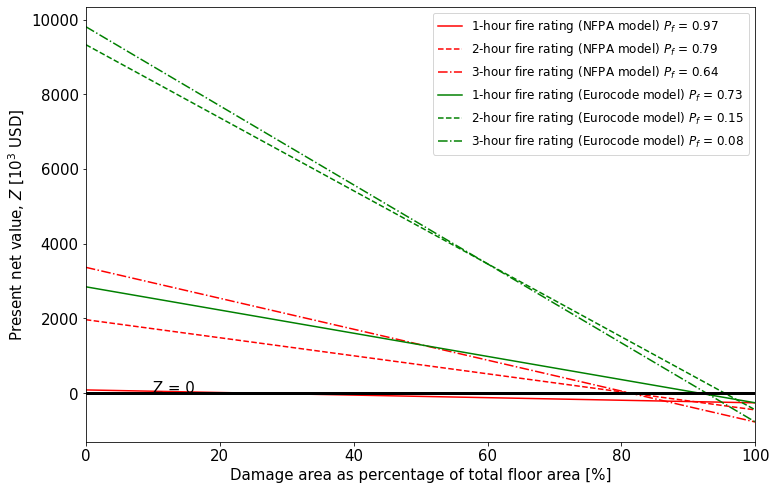

In [35]:
plt.rcParams.update({'font.size': 15})

psfrm = psfrm
Dam_rate=np.array(range(0,105,5))
Dam_area = (Dam_rate/100)*S_area # [m2] floor area damaged
print(Dam_area)

Zvalues=np.zeros((len(psfrm),len(Dam_area)))

for i,area in enumerate(Dam_area):
    out = Zvalue(psfrm,area)
    Zvalues[:,i] = out[0]

# Plot the data
fig,ax = plt.subplots(1,1)

color = (['r','r','r', 'g', 'g', 'g'])
linestyle = (['solid','dashed','dashdot','solid','dashed','dashdot','solid','dashed','dashdot'])

legends = []
for j,ps in enumerate(psfrm):
    ax.plot(Dam_rate,Zvalues[j,:]/1e3,linestyle=linestyle[j],color=color[j])
    if j<3: legends.append(str(j+1)+'-hour fire rating (NFPA model) $P_{f}$ = '+str(round(1-ps,2)))
    else: legends.append(str(j-2)+'-hour fire rating (Eurocode model) $P_{f}$ = '+str(round(1-ps,2)))

ax.plot([0,100],[0,0],linestyle='solid',color='k',linewidth=3.0)
ax.text(10,0.15,'Z = 0')
ax.set_xlim([0,100])

ax.set_xlabel('Damage area as percentage of total floor area [%]') 
ax.set_ylabel('Present net value, $Z$ [$10^3 $ USD]')
ax.legend(legends,fontsize=12)

fig.set_size_inches(12,8)